In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
zr=zipfile.ZipFile('/content/drive/MyDrive/cat vs dog train.zip')
zr.extractall('/content')
zr.close()

zf=zipfile.ZipFile('/content/drive/MyDrive/cat vs dog test1.zip')
zf.extractall('content')
zf.close()

In [19]:
import os 
import shutil
import glob
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [5]:
train_dir="./cat&dog"
dir_ori="/content/train"
Class=["cat","dog"]

In [6]:
os.listdir("/content/train")[-1]

'cat.10540.jpg'

In [7]:
for i in Class:
    dset=os.path.join(train_dir,i)
    if not os.path.exists(dset):
        os.makedirs(dset)
        
    for img_path in glob.glob(os.path.join(dir_ori,i)+"*"):
        src=img_path
        
        shutil.copy(src,dset)

In [1]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras 

In [2]:
#train generator 
train_d=ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              validation_split=0.3,
                              horizontal_flip=True)

In [3]:
train_data=train_d.flow_from_directory("/content/cat&dog",
                                       batch_size=32,
                                       target_size=(256,256),
                                       subset="training",
                                       class_mode="binary",
                                      )

Found 17500 images belonging to 2 classes.


In [4]:
val_data=train_d.flow_from_directory("/content/cat&dog",
                                            target_size=(256,256),
                                            batch_size=32,
                                            class_mode="binary",
                                            subset="validation"
                                                )

Found 7500 images belonging to 2 classes.


In [5]:
train_data.class_indices

{'cat': 0, 'dog': 1}

In [26]:
t_img,label=train_data.next()

In [ ]:
label.shape

(32,)

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
t_img

array([[[[0.641908  , 0.6536727 , 0.67328054],
         [0.641908  , 0.6536727 , 0.67328054],
         [0.641908  , 0.6536727 , 0.67328054],
         ...,
         [0.61581683, 0.62758154, 0.6471894 ],
         [0.61581683, 0.62758154, 0.6471894 ],
         [0.61581683, 0.62758154, 0.6471894 ]],

        [[0.6180918 , 0.6298565 , 0.64946437],
         [0.6180918 , 0.6298565 , 0.64946437],
         [0.6180918 , 0.6298565 , 0.64946437],
         ...,
         [0.60645247, 0.6182172 , 0.637825  ],
         [0.60645247, 0.6182172 , 0.637825  ],
         [0.60645247, 0.6182172 , 0.637825  ]],

        [[0.5963567 , 0.6081214 , 0.62772924],
         [0.5963567 , 0.6081214 , 0.62772924],
         [0.5963567 , 0.6081214 , 0.62772924],
         ...,
         [0.6039216 , 0.6156863 , 0.63529414],
         [0.6039216 , 0.6156863 , 0.63529414],
         [0.6039216 , 0.6156863 , 0.63529414]],

        ...,

        [[0.04925997, 0.11200508, 0.17475016],
         [0.04925997, 0.11200508, 0.17475016]

In [15]:
import matplotlib.pyplot as plt

In [ ]:
def plotimage(img_arr,label):
    """
    input:image array
    output:plot image
    """
    for idx,img in enumerate(img_arr):
        if idx<=10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis=False
            plt.show()
    

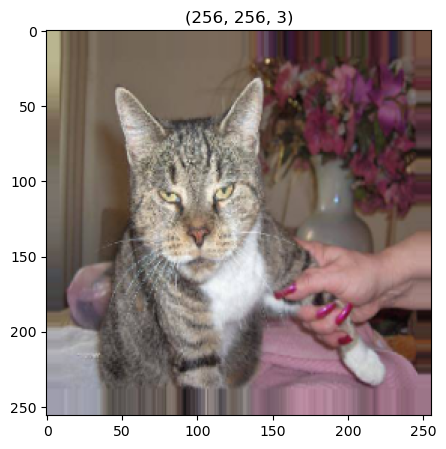

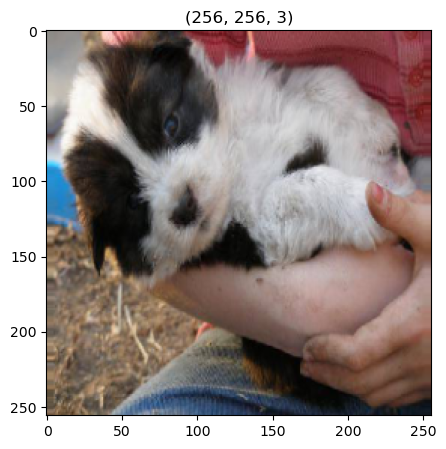

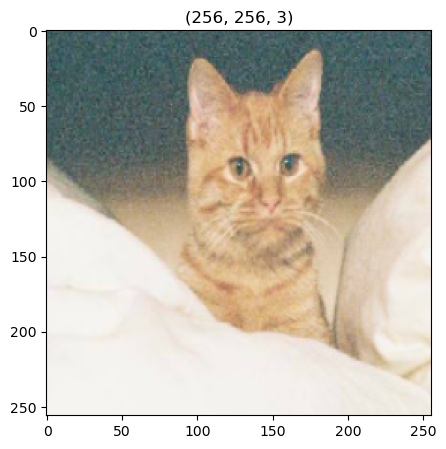

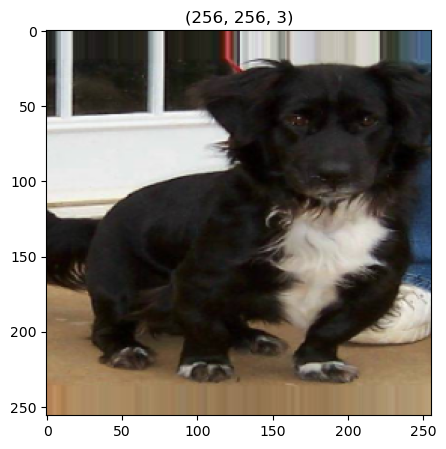

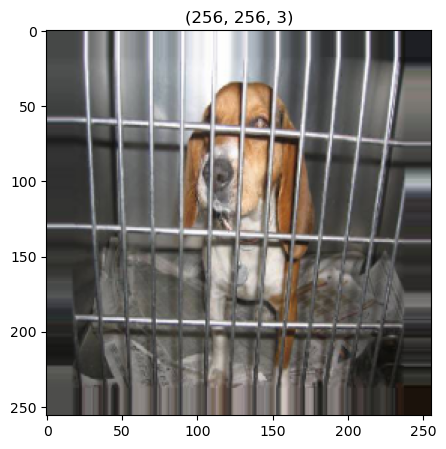

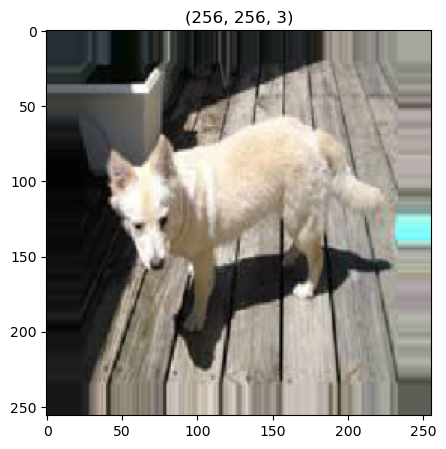

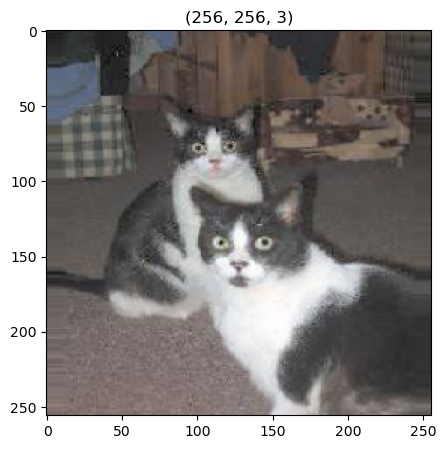

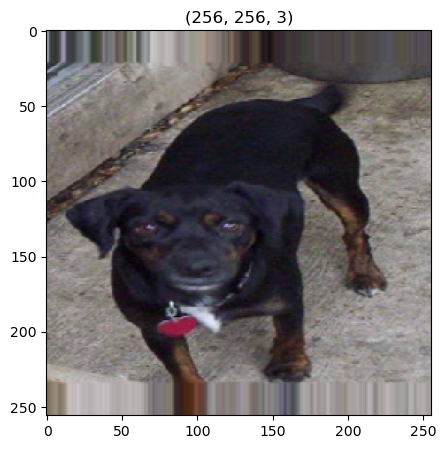

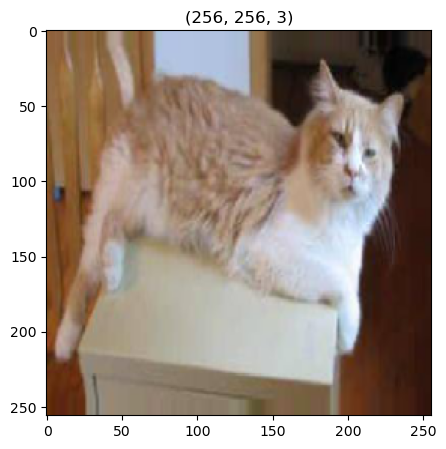

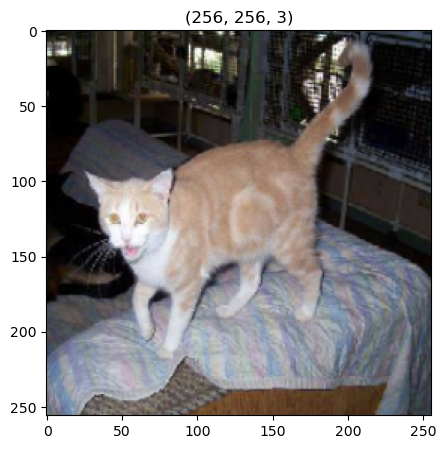

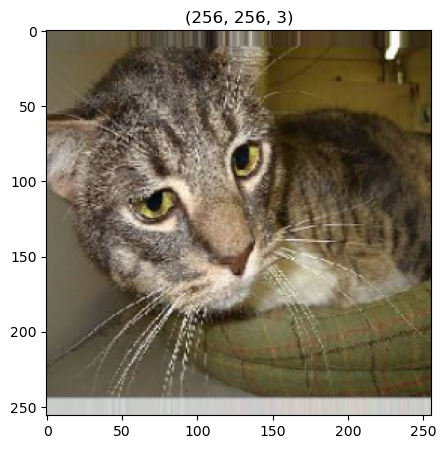

In [ ]:
plotimage(t_img,label)

In [6]:
from keras import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D,Dense,Flatten,Activation,BatchNormalization,Dropout
from keras.models import Model



In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # 2 because we have cat and dog classes

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [9]:
earlystop = EarlyStopping(patience=10)

In [10]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [11]:
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
train_data.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
val_data.labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
import numpy as np

In [ ]:
np.asarray(train_data.labels).astype('int').reshape((-1,1))
np.asarray(val_data.labels).astype('int').reshape((-1,1))

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [12]:
history = model.fit(train_data, epochs=10,validation_data=val_data,validation_steps=1,callbacks=callbacks)

Epoch 1/10
547/547 [==============================] - ETA: 0s - loss: 0.7303 - accuracy: 0.6381

547/547 [==============================] - 271s 489ms/step - loss: 0.7303 - accuracy: 0.6381 - val_loss: 0.7663 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 2/10
547/547 [==============================] - ETA: 0s - loss: 0.5818 - accuracy: 0.6916

547/547 [==============================] - 263s 481ms/step - loss: 0.5818 - accuracy: 0.6916 - val_loss: 0.5230 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 3/10
547/547 [==============================] - ETA: 0s - loss: 0.5165 - accuracy: 0.7429

547/547 [==============================] - 263s 480ms/step - loss: 0.5165 - accuracy: 0.7429 - val_loss: 0.4398 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/10
547/547 [==============================] - ETA: 0s - loss: 0.4600 - accuracy: 0.7806

547/547 [==============================] - 261s 477ms/step - loss: 0.4600 - accuracy: 0.7806 - val_loss: 0.3563 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/10
547/547 [==============================] - ETA: 0s - loss: 0.4377 - accuracy: 0.7988

547/547 [==============================] - 259s 474ms/step - loss: 0.4377 - accuracy: 0.7988 - val_loss: 0.4822 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/10
547/547 [==============================] - ETA: 0s - loss: 0.4127 - accuracy: 0.8141

547/547 [==============================] - 259s 474ms/step - loss: 0.4127 - accuracy: 0.8141 - val_loss: 0.6110 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 7/10
547/547 [==============================] - ETA: 0s - loss: 0.3786 - accuracy: 0.8300

547/547 [==============================] - 263s 481ms/step - loss: 0.3786 - accuracy: 0.8300 - val_loss: 0.2906 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 8/10
547/547 [==============================] - ETA: 0s - loss: 0.3561 - accuracy: 0.8422

547/547 [==============================] - 260s 475ms/step - loss: 0.3561 - accuracy: 0.8422 - val_loss: 1.0708 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 9/10
547/547 [==============================] - ETA: 0s - loss: 0.3429 - accuracy: 0.8495

547/547 [==============================] - 259s 473ms/step - loss: 0.3429 - accuracy: 0.8495 - val_loss: 0.3798 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 10/10
547/547 [==============================] - ETA: 0s - loss: 0.3208 - accuracy: 0.8607

547/547 [==============================] - 260s 476ms/step - loss: 0.3208 - accuracy: 0.8607 - val_loss: 0.2118 - val_accuracy: 0.8750 - lr: 0.0010


In [13]:
Model_Results = model.evaluate(val_data)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

235/235 [==============================] - 110s 468ms/step - loss: 0.5356 - accuracy: 0.7759
LOSS:  0.5356
ACCURACY:  0.78


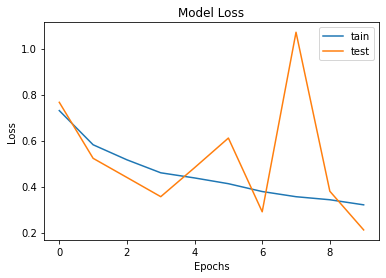

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['tain','test'])
plt.show()

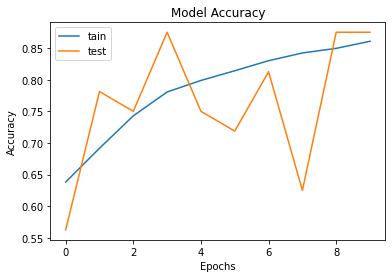

In [17]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['tain','test'])
plt.show()

In [20]:
test_filenames = os.listdir("/content/content/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [22]:
test_df.head()

,filename
0,2962.jpg
1,2390.jpg
2,7240.jpg
3,10185.jpg
4,1144.jpg


In [23]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/content/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(256,256),
    batch_size=32,
    shuffle=False
)

Found 12500 validated image filenames.


In [24]:
predictions= (model.predict(test_generator) > 0.5).astype("int32")

391/391 [==============================] - 42s 106ms/step


In [25]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

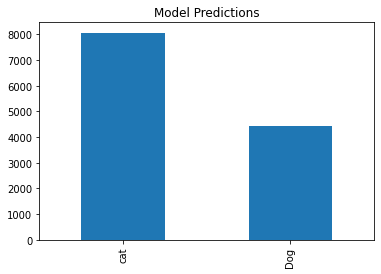

In [34]:
test_df["predicted"]=["cat" if y<0.5 else "Dog" for y in predictions]
test_df["predicted"].value_counts().plot(kind="bar",title="Model Predictions")

In [27]:
import random

In [35]:
train_data.class_indices

{'cat': 0, 'dog': 1}

In [42]:
val_img,val_label=val_data.next()

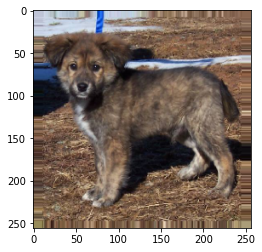


1/1 [==============================] - 0s 16ms/step

Predicting dog


In [47]:
idx3=random.randint(0,len(val_label))
plt.imshow(val_img[idx3,:])
plt.show()
print()
y_pred=model.predict(val_img[idx3,:].reshape(1,256, 256, 3))
y_pred=y_pred>0.5
if y_pred==0:
  print("\nPredicting cat")
else:
  print('\nPredicting dog')